In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [149]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [150]:
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs

In [151]:
dataset_root = Path('../../Dataset/ingested')

In [152]:
#df_file = sorted(list((dataset_root).glob('features*.csv')))[ 0 ]
df_file = sorted(list((dataset_root).glob('fsfel_spectral_features*.csv')))[ 0 ]
df_features = pd.read_csv( df_file, index_col = 'sample_name' )
print(df_file)

../../Dataset/ingested/fsfel_spectral_features_0.csv


In [154]:
df_features

,FFT mean coefficient_0,FFT mean coefficient_1,FFT mean coefficient_10,FFT mean coefficient_100,FFT mean coefficient_101,FFT mean coefficient_102,FFT mean coefficient_103,FFT mean coefficient_104,FFT mean coefficient_105,FFT mean coefficient_106,...,Wavelet standard deviation_8,Wavelet variance_0,Wavelet variance_1,Wavelet variance_2,Wavelet variance_3,Wavelet variance_4,Wavelet variance_5,Wavelet variance_6,Wavelet variance_7,Wavelet variance_8
sample_name,,,,,,,,,,,,,,,,,,,,,
MAC000002-2012-10,1.877513e-04,0.008001,0.013338,0.000668,0.000238,0.000209,3.061897e-04,0.000219,0.000663,0.000690,...,0.457496,0.020536,0.041642,0.076114,0.118772,0.159664,0.187189,0.199345,0.203901,0.209303
MAC000002-2012-11,7.252058e-05,0.002853,0.008534,0.000405,0.000703,0.000238,6.301526e-04,0.000401,0.000893,0.000891,...,0.386419,0.030100,0.042896,0.057508,0.077917,0.095408,0.108746,0.120687,0.133895,0.149320
MAC000002-2012-12,6.966156e-05,0.004212,0.012522,0.001159,0.000182,0.000372,4.422100e-04,0.000350,0.000389,0.001855,...,0.429587,0.031424,0.050123,0.071109,0.094537,0.114834,0.131182,0.146861,0.164570,0.184545
MAC000002-2013-01,4.767873e-05,0.002176,0.015639,0.000276,0.000372,0.000488,4.809425e-04,0.000461,0.001168,0.001128,...,0.474740,0.031152,0.054426,0.069617,0.089890,0.116362,0.145060,0.173281,0.200144,0.225378
MAC000002-2013-02,1.649079e-03,0.000821,0.016528,0.001033,0.000607,0.000783,3.087494e-03,0.000546,0.001094,0.001560,...,0.708554,0.038880,0.085373,0.162035,0.242712,0.310418,0.366311,0.415521,0.460266,0.502049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAC000036-2012-07,1.336914e-06,0.000042,0.000613,0.000041,0.000031,0.000054,9.061059e-05,0.000023,0.000026,0.000064,...,0.100241,0.003644,0.004351,0.005060,0.006127,0.007809,0.009306,0.009966,0.010026,0.010048
MAC000036-2012-08,5.830233e-08,0.000022,0.000790,0.000040,0.000070,0.000033,2.844589e-05,0.000047,0.000025,0.000192,...,0.108085,0.004342,0.004727,0.005289,0.005549,0.006693,0.008213,0.009467,0.010532,0.011682
MAC000036-2012-09,1.084808e-06,0.000070,0.000611,0.000049,0.000045,0.000034,4.973202e-05,0.000022,0.000019,0.000099,...,0.097624,0.003299,0.003054,0.003673,0.004611,0.006145,0.007606,0.008509,0.009030,0.009530


# DBSCAN cluster visualization

## First transform in 2D than cluster with DBSCAN


In [155]:
def visualize_clusters_dbscan( reduced_data, eps=0.3, min_samples=10, reduction_name = '' ):

    X = reduced_data
    
    
    db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None ).fit(X)
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

    # #############################################################################
    # Plot result

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    plt.figure( figsize = (14,8) )
    for k, col in zip(unique_labels, colors):

        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title(f"Reduction: {reduction_name} Estimated number of clusters: {n_clusters_}")
    plt.show()

In [156]:
data = df_features.values

Estimated number of clusters: 11
Estimated number of noise points: 29
Silhouette Coefficient: 0.166


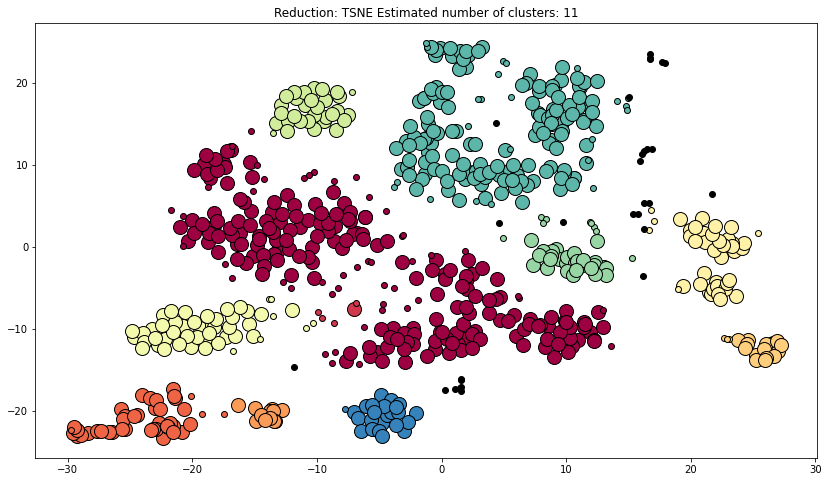

In [187]:
np.random.seed(101)
reduced_data = make_pipeline(StandardScaler(), TSNE(n_components=2)).fit_transform(data).astype( np.float64 )
visualize_clusters_dbscan( reduced_data, reduction_name = 'TSNE', eps = 3 )

In [158]:
df_features.describe().T

,count,mean,std,min,25%,50%,75%,max
FFT mean coefficient_0,698.0,0.000419,0.001217,0.000000,0.000016,0.000074,0.000302,0.013481
FFT mean coefficient_1,698.0,0.011325,0.029004,0.000000,0.000475,0.002475,0.011459,0.552095
FFT mean coefficient_10,698.0,0.064055,0.276170,0.000000,0.001397,0.006450,0.018784,3.058867
FFT mean coefficient_100,698.0,0.000551,0.000852,0.000000,0.000083,0.000275,0.000678,0.006853
FFT mean coefficient_101,698.0,0.000492,0.000726,0.000000,0.000087,0.000265,0.000596,0.009068
...,...,...,...,...,...,...,...,...
Wavelet variance_4,698.0,0.435913,1.616150,0.000024,0.023345,0.070735,0.225449,17.894397
Wavelet variance_5,698.0,0.562049,2.132396,0.000027,0.029114,0.082628,0.273146,23.601140
Wavelet variance_6,698.0,0.677000,2.605548,0.000030,0.033192,0.097852,0.324091,28.823048
Wavelet variance_7,698.0,0.789690,3.077148,0.000034,0.037228,0.114280,0.369413,34.029862


In [159]:
from collections import namedtuple

class Results(namedtuple('Results',['algo','param','n_clusters','n_outliers',
                                    'ratio_outliers','score'])):
    def __str__(self):
        return(f'algo={self.algo:6s}, '+
               f'param={self.param:4.3f}, '+
               f'n_clusters={self.n_clusters:4d}, '+
               f'n_outliers={self.n_outliers:5d}, '+
               f'ratio_outliers={self.ratio_outliers:0.3f}, '+
               f'score={self.score:0.3f}')

class PipeResults(namedtuple('PipeResults',['pca','tsne','result'])):
    def __str__(self):
        return((f'pca={self.pca:4d}, ' if not self.pca is None else 'pca=None, ') +
               (f'tsne={self.tsne:4d}, ' if not self.tsne is None else 'tsne=None, ') +
                f'{self.result}')
    

In [179]:
def scale_data( X, pca, tsne ):
    scaled_data =   StandardScaler().fit_transform(X)
    if not pca is None :
        scaled_data = PCA( n_components = pca ).fit_transform(scaled_data)
    if not tsne is None :
        scaled_data = TSNE( n_components = tsne ).fit_transform(scaled_data)
    scaled_data = scaled_data.astype( np.float64 )
    return scaled_data

def dbascan_bench( X, eps ):
    
    db = DBSCAN( eps= eps, 
                 min_samples = 10, 
                 metric='euclidean', 
                 metric_params=None, 
                 algorithm='auto', 
                 leaf_size=30, p=None ).fit(X)  
    
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in db.labels_ else 0)
    n_outliers = list(labels).count(-1)
    if n_clusters > 1 :
        score = metrics.silhouette_score(X, labels)
    else :
        score = np.nan
        
    return Results( algo = 'DBSCAN', 
                    param = eps,
                    n_clusters = n_clusters,
                    n_outliers = n_outliers,
                    ratio_outliers = n_outliers / len(X),
                    score = score )   

In [180]:
import warnings
warnings.filterwarnings('ignore')

In [181]:
from tqdm import tqdm

In [194]:
%%time
np.random.seed(101)
results_list = []
for pca in tqdm([ None, 5, 10, 20, 30 ]) :
    for tsne in [ None, 2 ] :

        scaled_data = scale_data( df_features, pca, tsne )
        for eps in np.linspace( 0.1, 5, 100) :
            clustering_result = dbascan_bench( scaled_data, eps )
            results_list.append( { 'pca' : pca,'tsne' : tsne, **clustering_result._asdict() } )

100%|██████████| 5/5 [00:11<00:00,  2.32s/it]

CPU times: user 31.2 s, sys: 14.7 s, total: 45.9 s
Wall time: 11.6 s


In [195]:
df_results = pd.DataFrame(results_list)

In [196]:
result_summary = (df_results
                 .query( 'n_clusters > 1' )
                 .query( 'ratio_outliers < 0.1' )
                 .query( 'score > 0' )
                 .sort_values('score', ascending = False)
                 .groupby( 'n_clusters' )
                 .first()
                )
result_summary

,pca,tsne,algo,param,n_outliers,ratio_outliers,score
n_clusters,,,,,,,
2,30.0,2.0,DBSCAN,4.851515,5,0.007163,0.144557
3,5.0,2.0,DBSCAN,4.653535,66,0.094556,0.374005
4,5.0,2.0,DBSCAN,4.505051,68,0.097421,0.364055
5,20.0,2.0,DBSCAN,3.861616,5,0.007163,0.033308
6,5.0,2.0,DBSCAN,3.960606,0,0.000000,0.149842
7,5.0,2.0,DBSCAN,3.911111,0,0.000000,0.261284
8,5.0,2.0,DBSCAN,3.713131,0,0.000000,0.335184
9,5.0,2.0,DBSCAN,3.515152,8,0.011461,0.440462
10,10.0,2.0,DBSCAN,3.119192,17,0.024355,0.391699


<AxesSubplot:xlabel='n_clusters'>

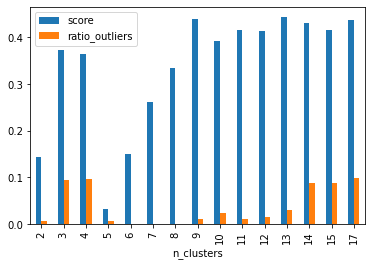

In [197]:
result_summary[['score','ratio_outliers']].plot(kind='bar')

Estimated number of clusters: 10
Estimated number of noise points: 8
Silhouette Coefficient: 0.428


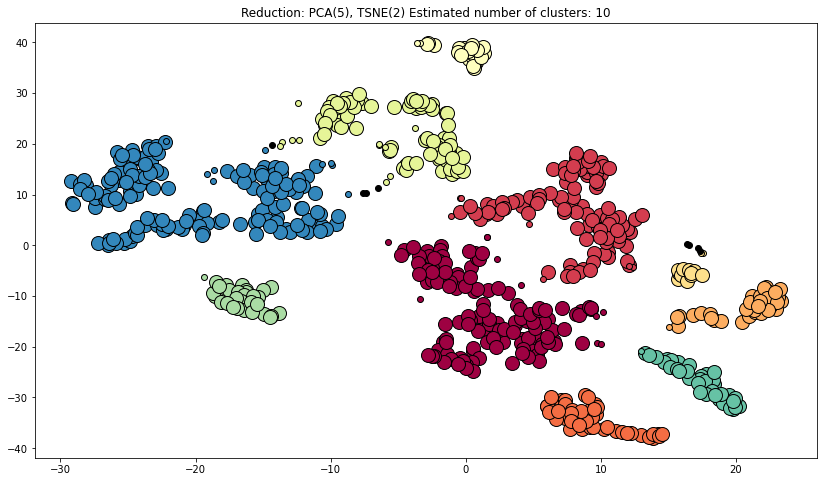

In [198]:
pca = 5
tsne = 2
eps = 3.5

scaled_data = scale_data( df_features, pca = pca, tsne = tsne )
visualize_clusters_dbscan( scaled_data, reduction_name = f'PCA({pca}), TSNE({tsne})', eps = eps )

In [199]:
db = DBSCAN( eps= eps, 
             min_samples = 10, 
             metric='euclidean', 
             metric_params=None, 
             algorithm='auto', 
             leaf_size=30, p=None ).fit(scaled_data)  

In [200]:
df_series_file = sorted(list((dataset_root).glob('series*.csv')))[ 0 ]
print(f'Reading series from {df_series_file}')
df_series = pd.read_csv( df_series_file , index_col = 'sample_name' )
df_series.head()

Reading series from ../../Dataset/ingested/series_0.csv


,01-00:00:00,01-00:30:00,01-01:00:00,01-01:30:00,01-02:00:00,01-02:30:00,01-03:00:00,01-03:30:00,01-04:00:00,01-04:30:00,...,31-19:00:00,31-19:30:00,31-20:00:00,31-20:30:00,31-21:00:00,31-21:30:00,31-22:00:00,31-22:30:00,31-23:00:00,31-23:30:00
sample_name,,,,,,,,,,,,,,,,,,,,,
MAC000002-2012-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.346,0.291,0.333,0.368,0.951,1.445,0.946,0.305,0.243,0.252
MAC000002-2012-11,0.252,0.241,0.230,0.209,0.231,0.193,0.186,0.148,0.183,0.147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAC000002-2012-12,0.215,0.217,0.237,0.204,0.243,0.199,0.237,0.125,0.104,0.115,...,0.227,0.228,1.168,0.272,0.237,0.231,0.263,0.220,0.236,0.229
MAC000002-2013-01,0.219,0.241,0.191,0.235,0.182,0.229,0.194,0.201,0.122,0.099,...,0.194,0.214,1.078,0.227,0.250,0.240,0.281,0.248,0.266,0.257
MAC000002-2013-02,0.215,0.284,0.313,0.286,0.204,0.269,0.204,0.266,0.216,0.223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
set(db.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [202]:
def show_cluster_sample( df_series, num_samples, cluster, figsize = (14,6) ):
    name = f'#{cluster}' if cluster >= 0 else 'Outliers'
    ( df_series
      .assign( cluster = db.labels_ )
      .reset_index()
      .groupby(['cluster','sample_name'])
      .first()
      .loc[(cluster,)]
      .sample( num_samples, replace = False )  
      .T
    ).plot( figsize = (14,6), subplots = True, title = f'{num_samples} samples of Cluster {name}' )
    plt.show()


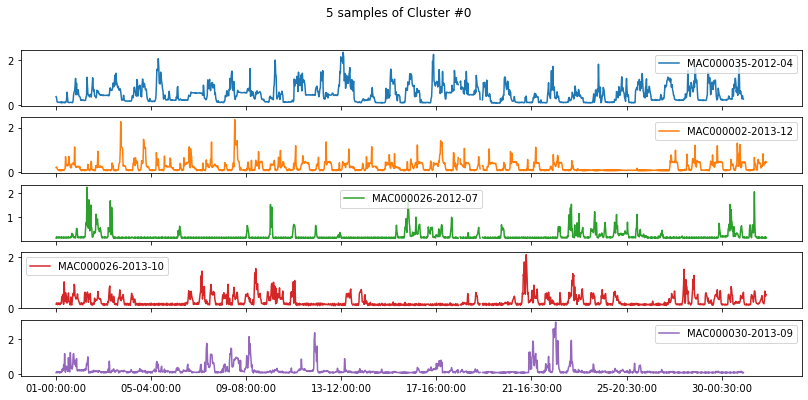

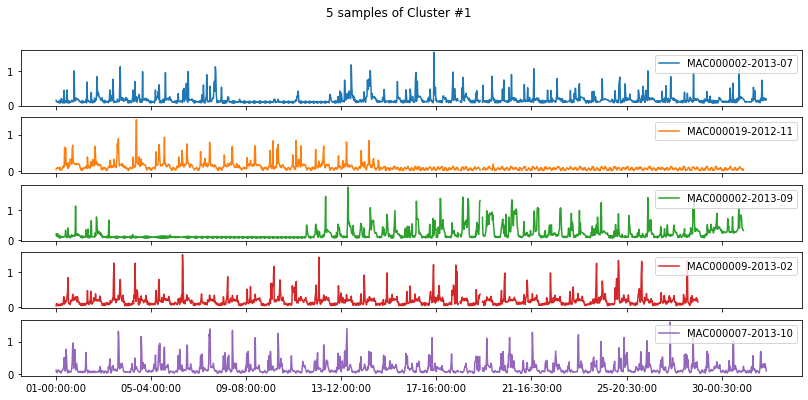

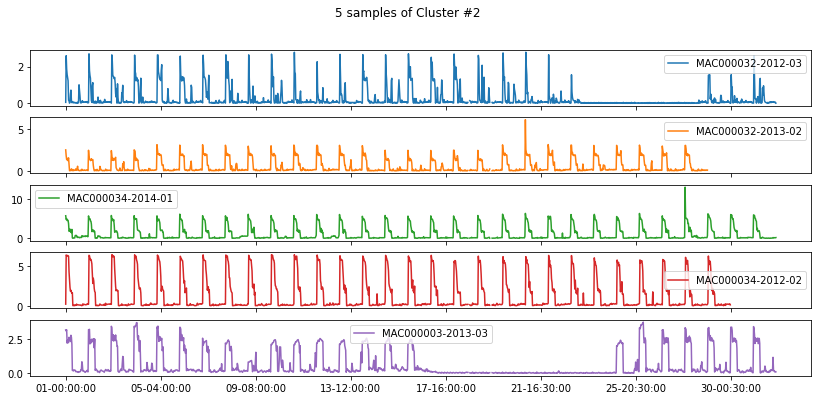

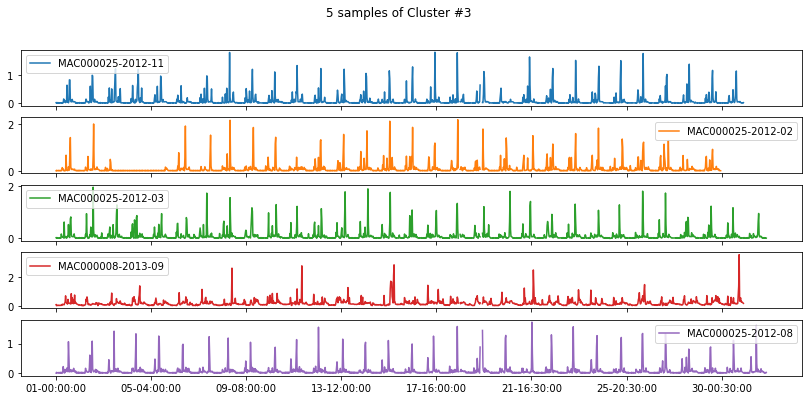

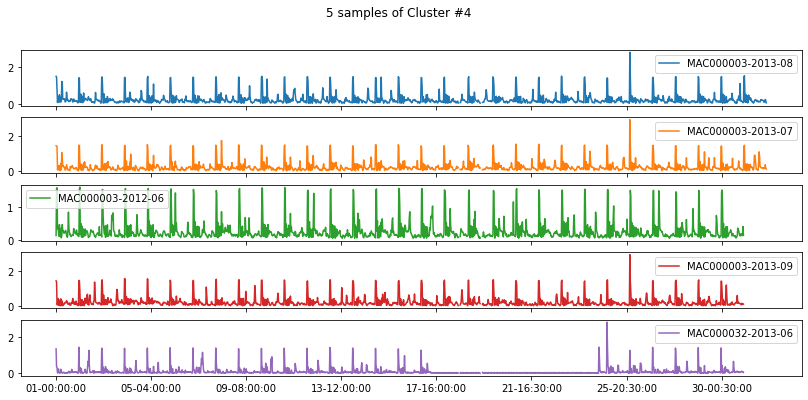

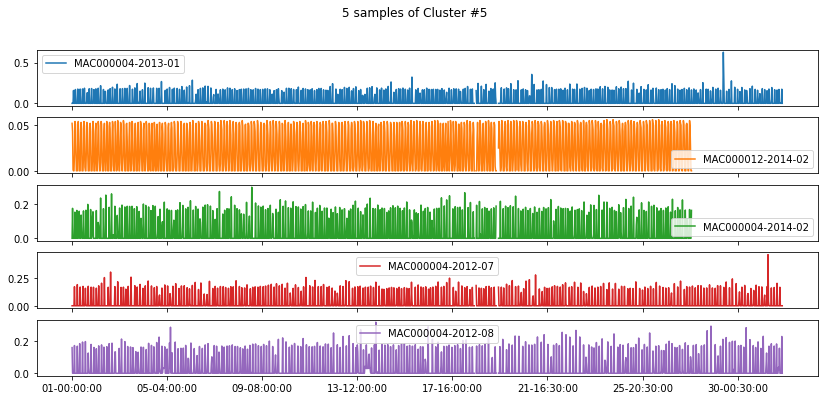

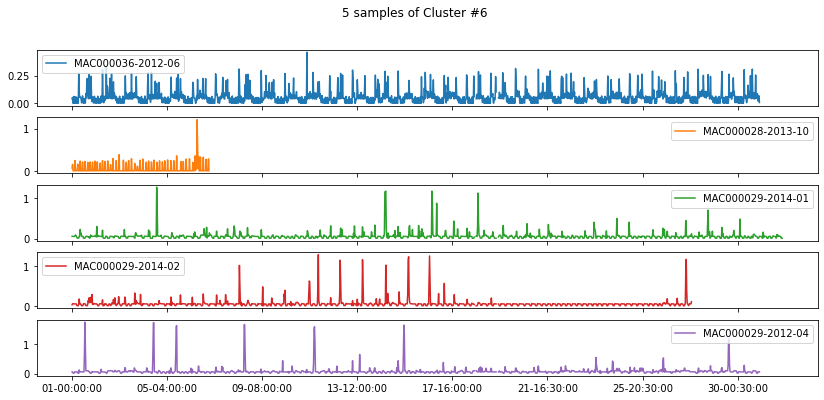

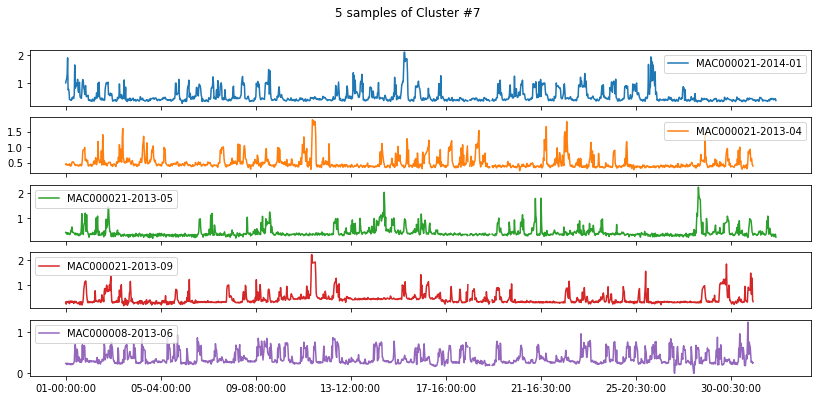

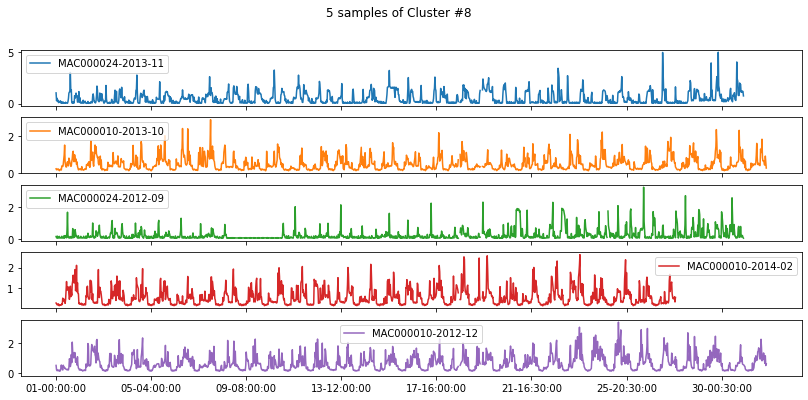

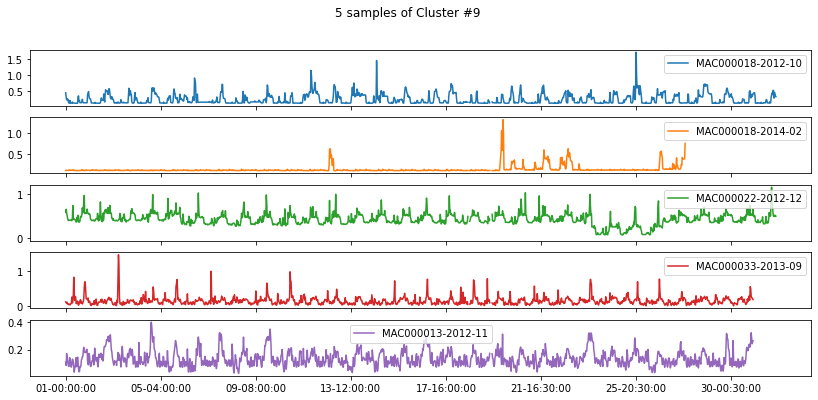

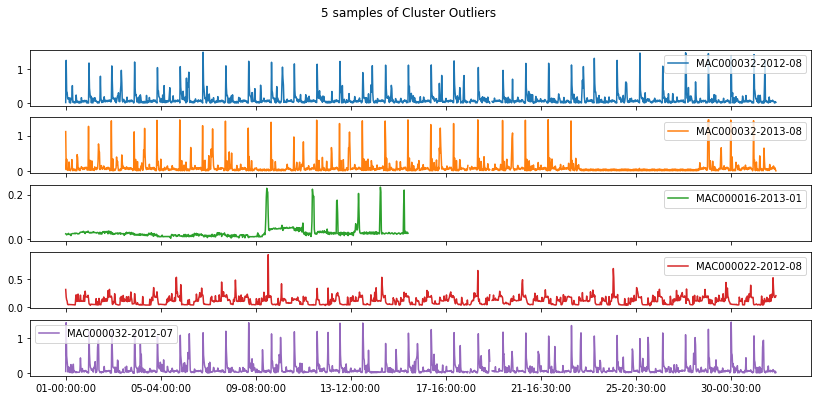

In [203]:
for c in set(db.labels_):
    show_cluster_sample( df_series, 5, c )